In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read in data and view first 5 observations
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


The left-most column titled City seems to contain State names rather than cities, and the description of the dataset as given on Kaggle is given as containing the data for the states. “This data set contains statistics, in arrests per 100,000 residents,
for assault, murder, and rape in each of the 50 US states in 1973. Also given is the
percent of the population living in urban areas.”  Quoted description  copied out of HD Task Brief.

In [2]:
# get row and column shape
print(df.shape)

df.rename(columns = {'City' : 'State'}, inplace=True)
df.head()


(50, 5)


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

df['State_abv'] = df['State'].map(state_abbrev)

states_abvs=df['State_abv']
df.set_index(['State'], inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape,State_abv
State,,,,,
Alabama,13.2,236,58,21.2,AL
Alaska,10.0,263,48,44.5,AK
Arizona,8.1,294,80,31.0,AZ
Arkansas,8.8,190,50,19.5,AR
California,9.0,276,91,40.6,CA


The shape of the data at 50 observations confirms that the data set contains 1 record per state for each of the 50 states in the US, so the column is renamed to avoid confusion.  The 2 letter abbreviations for the 50 states have also been pulled into the data frame to give an option for cleaner plotting

In [4]:
# get data types for columns annd check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Murder     50 non-null     float64
 1   Assault    50 non-null     int64  
 2   UrbanPop   50 non-null     int64  
 3   Rape       50 non-null     float64
 4   State_abv  50 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.3+ KB


In this case there are no missing values so there is no need to impute any missing data as all observations are complete and usable

In [5]:
# get descriptive statistics for each column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Looking at the detail, it is evident that assault has a mean and standard deviation that is significantly higher than the other columns.  It is also stated in the description of the datatset that the number in the 'UrbanPop' column is a percentage of the entire population of the state, whereas the 3 arrest types are a count of arrest incidents per 100,000 residents, so scaling the data is a good idea to keep proportions consistent.

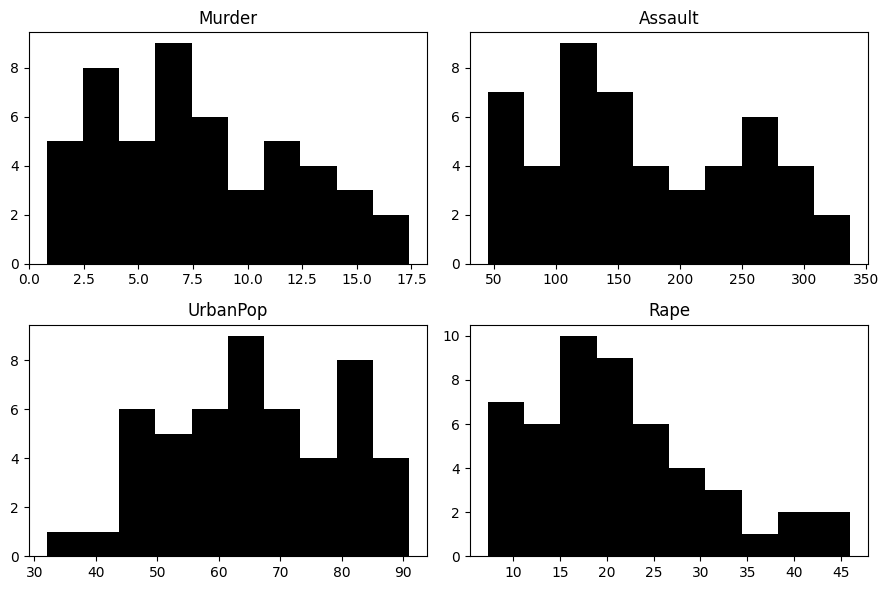

In [6]:
# Plot histograms to get the distribution of values within each feature
histograms = df.hist(color='black', grid=False, figsize=(9, 6)) 
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Features')

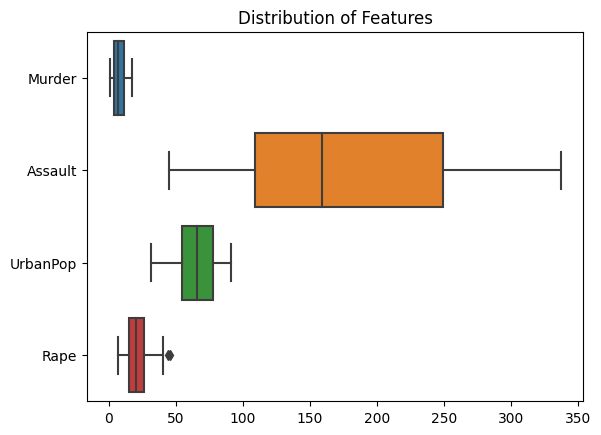

In [7]:
# plot boxplot to show distribution of feature values in comparison to each other
sns.boxplot(df, orient='h')
plt.title('Distribution of Features')

Looking at the histograms there is no consistent pattern of distribution.  The box plot also confirms that the Assault arrest type has a significantly larger count within the data and has the potential to skew our analyses if we do not scale the dataset.  There is also still the matter of the urban population feature being a percentage rather than a count

At this point with only 4 features in the dataset it seems wise not to drop any columns just yet and to continue the analysis with all features in place.  State name is considered a label rather than a feature so is not included in the analysis data

<AxesSubplot: >

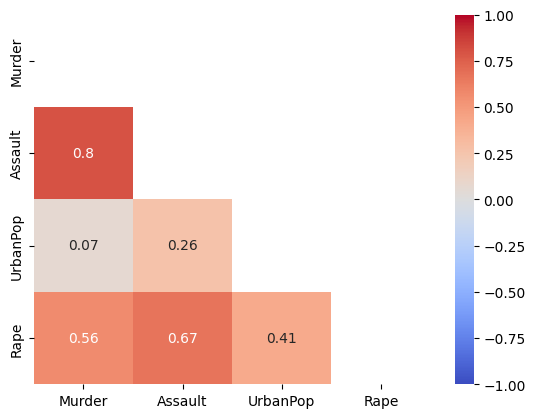

In [8]:
#  plot a correlation heatmap to identify relationships between features
cm = 'coolwarm'

corr_df = df.corr(numeric_only=True)
labels =corr_df.columns


mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool_)
sns.heatmap(corr_df, mask=mask_ut, cmap=cm, annot=True, vmin=-1,vmax=1)

The strongest positive correlation between features is between assault and murder, followed by a somewhat strong correlation between assault and rape.  This makes sense as both rape and murder are more extreme sub-categories of assault.  Interestingly the lowest correlations are between urban population and each of the arrest types with the correlation between urban population and murder being close to neglible.

In [9]:
# scale data using standardisation
from sklearn.preprocessing import StandardScaler

X = df.drop(['State_abv'], axis=1).values.reshape(-1,4)
X = StandardScaler().fit_transform(X)


The data has been scaled using a standard scaler to account for the earlier observations with inconsistency in the size of feature values

In [10]:
# conduct pca using the sklearn's inbuilt functionality
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(principal_components, columns=['PC1','PC2','PC3','PC4'])
pca_df.head()


,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


Principal Component Analyis (PCA) has been done using SKlearn's pca model to determine to what extent each feature contributes to the variances within the dataset.  Due to the small number of features in the dataset no limit has been set and all features have been returned

In [11]:
# get descriptions of the affect on variance from the principal components output above
std = pca_df.describe().transpose()['std']
print(f'Standard deviation: {std.values:}')
print(f'Proportion of Variance Explained: {pca.explained_variance_ratio_}')
print(f'Cumulative Proportion: {np.cumsum(pca.explained_variance_)}')

Standard deviation: [1.5908673  1.00496987 0.6031915  0.4206774 ]
Proportion of Variance Explained: [0.62006039 0.24744129 0.0891408  0.04335752]
Cumulative Proportion: [2.53085875 3.5408232  3.90466318 4.08163265]


Using the SKLearn's additional PCA functionality lists have been generated to show the proportion by which each metric contributes to the variance in the data.  The proportion list shows these variances by their % contribution to the whole variance, whereas the cumulative proportion shows the total variance of each component.  For interests sake the standard deviation for each component is also shown

Text(0.5, 1.0, 'Cumulative Explained Variance')

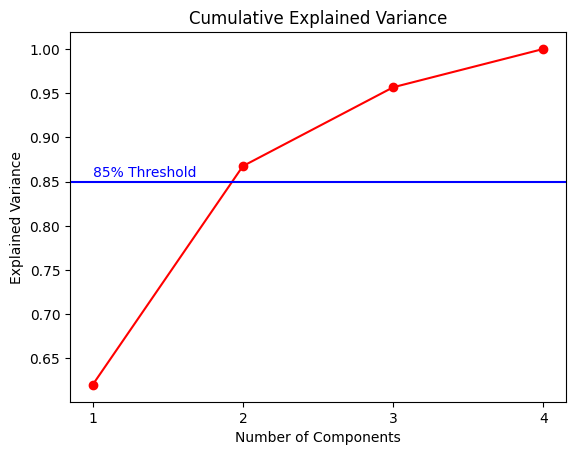

In [12]:
# plot variance to determine minimum number of components required to do analysis at desired variance threshold
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_), 'ro-',
         )
plt.axhline(y=0.85, color='b')
plt.text(1, 0.855, '85% Threshold', color='b')
plt.xticks(range(1,5), [i+1 for i in range(4)])
plt.title('Cumulative Explained Variance')

Plotting the Explained variance on a line chart it is evident that only 2 of the components are required to explain more than 85% of the variance in the data set and allows the dimensionality required for clustering to be reduced by half.

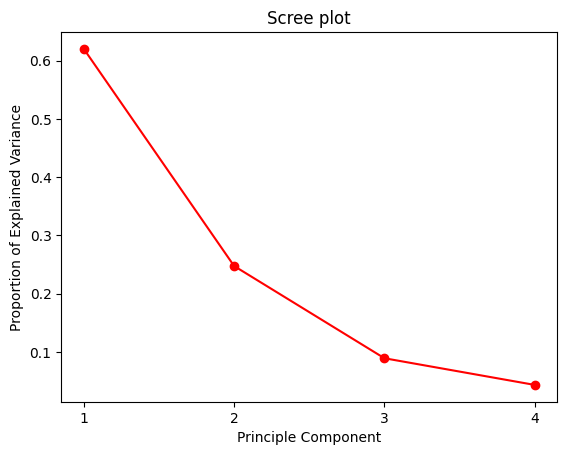

In [13]:
# plot  scree plot for confirmation of above
plt.plot(pca.explained_variance_ratio_, 'ro-')
plt.xticks(range(4), [i+1 for i in range(4)])
plt.xlabel('Principle Component')
plt.ylabel('Proportion of Explained Variance')
plt.title('Scree plot')
plt.show()

The scree plot shows a similar output to the previous line plot but as a portion of the actual variance number rather than a percentage 

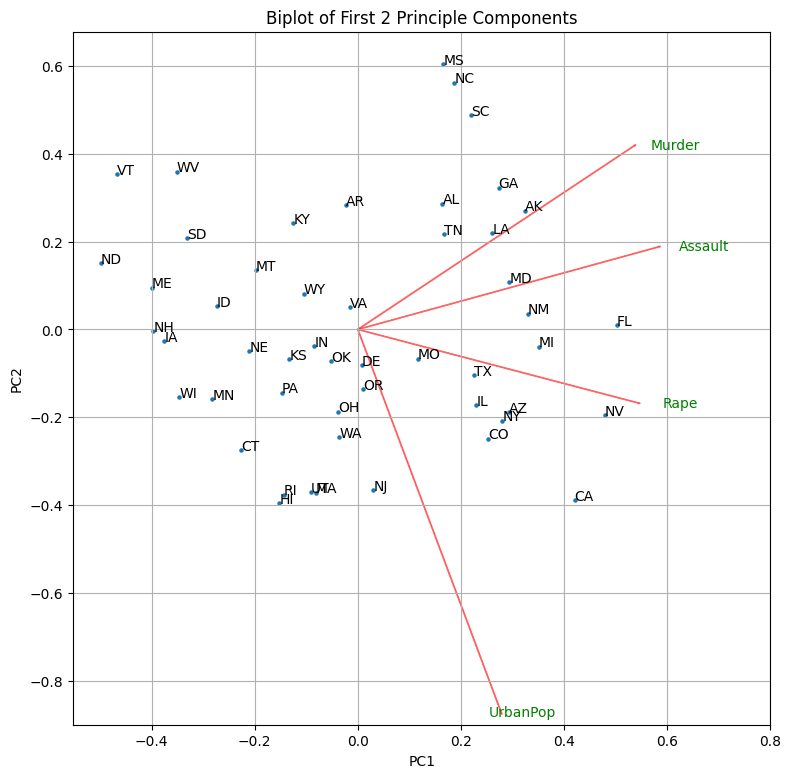

In [14]:
# plot biplot to show impact of the data features on the variance of the data

def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(9,9))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = states_abvs[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1], 'Var'+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1], labels[i], color = 'g', ha = 'center', va = 'center')

    ax.set_xlim(None, 0.8)
    ax.set_ylim(-0.9, None)
    
    plt.title('Biplot of First 2 Principle Components')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()


states = list(df.index)
biplot(principal_components[:,0:2],np.transpose(pca.components_[0:2, :]), labels=corr_df.columns, points=states)

plt.show()

The biplot above shows that the PC1 primary component on the x-axis relies primarily on the arrest type features as the vectors for these features chart largely along the horizontal with Assault contributing the most with the least slope, while the PC2 primary component on the y-axis relies primarily on the UrbanPop feature.

In [15]:
# get feature importance as number values to show their contribution to the principal components showing the biggest variance 

pc1 = abs(pca.components_[0]) 
pc2 = abs(pca.components_[1] )

pc_imp_df = pd.DataFrame()
pc_imp_df['Features'] = list(labels)
pc_imp_df['PC1 Importance'] = pc1
pc_imp_df['PC2 Importance'] = pc2
pc_imp_df.head()

,Features,PC1 Importance,PC2 Importance
0,Murder,0.535899,0.418181
1,Assault,0.583184,0.187986
2,UrbanPop,0.278191,0.872806
3,Rape,0.543432,0.167319


Pulling the feature importance for each feature in the 2 Principal components confirms the observation above that the Assault is the most important feature in PC1 and Urban Pop the most important in PC2

In [16]:
# drop low variance principal componets from data for the rest of the analysis and add state abbreviations back for easier labelling 

pc_df = pca_df.drop(['PC3', 'PC4'], axis=1)
pc_df['State'] = states_abvs
pc_df.head()


,PC1,PC2,State
0,0.985566,1.133392,AL
1,1.950138,1.073213,AK
2,1.763164,-0.745957,AZ
3,-0.141420,1.119797,AR
4,2.523980,-1.542934,CA


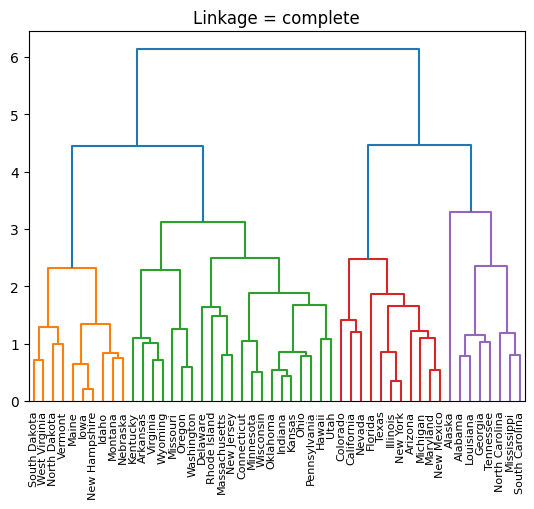

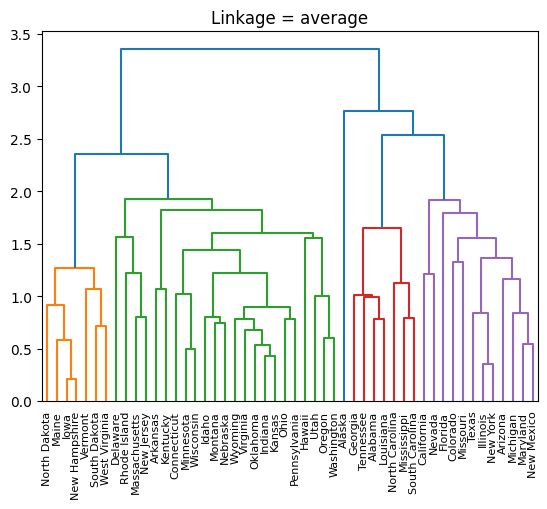

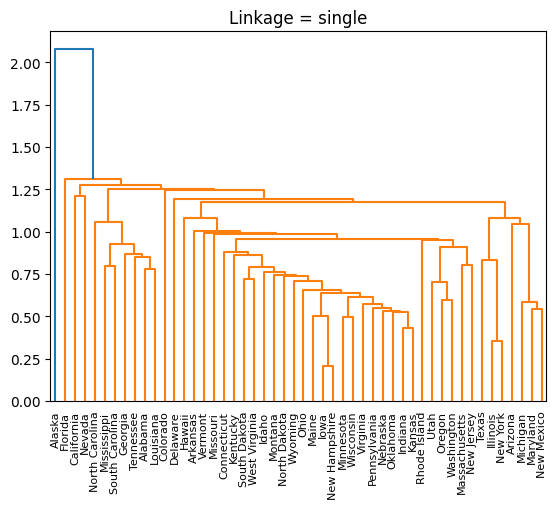

In [17]:
# plot dendograms for hierarchical clustering using different linkage types to determine optimum number of clusters

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 

linkage_types = ['complete', 'average', 'single']

for l in linkage_types:   
    dend = dendrogram(linkage(pca_df, method=l, metric='euclidean'), labels=df.index)
    plt.title(f'Linkage = {l}')
    plt.show()

Using hierarchical clustering across 3 different linkage types, the dendograms above the complete linkage dendogram gives 4 distinct clusters.  This gives a good guidance for the number of clusters to use when clustering using K-means

C:\Users\Lauren\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


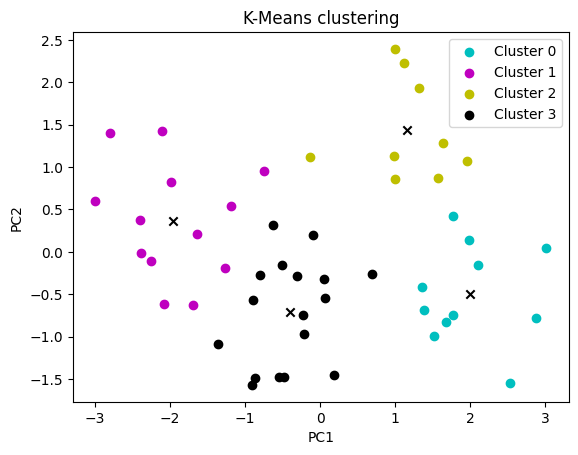

In [31]:
# run kmeans clustering model using clusters determined from dendograms and plot on scatter plot

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_km = pc_df.drop('State', axis=1).values.reshape(-1,2)
k = 4

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
c_labels = kmeans.fit_predict(X_km)
colours = 'cmyk'
for c in range(k):
  plt.scatter(X_km[c_labels == c, 0], X_km[c_labels == c,1], c = colours[c], label = 'Cluster {}'.format(c))
  plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.title('K-Means clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


Having completed the K-means clustering using 4 clusters the plot above shows how they well balanced into 4 areas in our plot, are distinct with no overlap, and divided neatly in an alignment that corresponds to the vector lines on the bi-plot, suggesting the data will be split into high and low arrest rates along the x-axis (clusters 1 & 2 = low, clusters 0 & 3 = high), and also split into high and low urban population (clusters 2 & 3 = high, clusters 0 & 1 = low)

In [32]:
# add cluster labels to original dataframe
df['Cluster'] = c_labels
df.head()

,Murder,Assault,UrbanPop,Rape,State_abv,Cluster
State,,,,,,
Alabama,13.2,236,58,21.2,AL,2
Alaska,10.0,263,48,44.5,AK,2
Arizona,8.1,294,80,31.0,AZ,0
Arkansas,8.8,190,50,19.5,AR,2
California,9.0,276,91,40.6,CA,0


In [33]:
# group by cluster and display means for each feature
df.groupby('Cluster').mean()

C:\Users\Lauren\AppData\Local\Temp\ipykernel_45856\1014496128.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cluster').mean()


,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,11.054545,264.090909,79.090909,32.618182
1,3.600000,78.538462,52.076923,12.176923
2,13.500000,245.777778,53.111111,23.977778
3,5.852941,141.176471,73.647059,19.335294


Adding the cluster labels back to the original dataframe and getting the mean of each feature by cluster confirms the previous assessment of the cluster plot showing the divides into highs and lows by arrest counts and urban population percentages